# Plant Nutrition Prediction
```
Implementing machine learning algorithms to predict plant nutrition values from a sample dataset.
```

# I - Introduction

```
Name         : Muhamad Arif Rachman Hatab

Organization : Hacktiv8 FTDS-017-RMT

Dataset      : Dataset sample from ARIA Agriculture Company

Objective    : 
1. Explore and Analyze the dataset.
2. Look for the key factors.
3. Make a model to predict plan nutrition from the dataset.
```

# II - External Link

```
Hugging Face      : https://huggingface.co/spaces/radianao/FinalProject-Aria
Presentation Deck : https://www.canva.com/design/DAFbBV0zBzQ/vhZ5zDwfu4jxxFQB3eDlwg/view?utm_content=DAFbBV0zBzQ&utm_campaign=designshare&utm_medium=link&utm_source=homepage_design_menu
```

# III - Working Area

## 1 - Import Libraries

In [1]:
# Import Library
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
!pip install phik # Installing essential additional module
import phik
from phik.report import plot_correlation_matrix

# Machine Learning Model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Metrics and Tuning
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error

# Model Saving
import pickle
import json

ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2 - Data Loading

In [2]:
# Load Dataset
df = pd.read_csv('aria_data.csv')

# Show Head
df.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
0,4.63,260.600000,199.000000,391.333333,371.733333,466.800000,273.133333,742.066667,4047.733333,lab 1
1,5.00,263.200000,194.600000,393.666667,348.533333,401.800000,220.066667,712.000000,4673.466667,lab 1
2,4.91,247.266667,205.800000,375.466667,354.866667,419.000000,222.133333,677.200000,4386.800000,lab 1
3,4.77,257.944444,191.833333,368.722222,334.666667,417.222222,195.944444,678.555556,4588.777778,lab 1
4,4.89,258.200000,195.733333,356.666667,333.333333,394.600000,196.000000,677.133333,4867.066667,lab 1


In [3]:
# Show Tail
df.tail()

,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
155,4.83,573.2500,361.250000,643.125000,489.812500,666.875,355.250000,712.312500,3943.687500,lab 2
156,4.47,678.3750,398.125000,678.250000,541.125000,704.000,393.500000,788.812500,3928.187500,lab 2
157,4.63,634.0000,382.866667,657.466667,505.066667,719.200,366.600000,792.133333,3861.200000,lab 2
158,4.35,615.3125,366.750000,642.937500,483.687500,675.625,359.062500,730.125000,3859.062500,lab 2
159,4.43,575.2000,350.266667,648.333333,495.400000,679.800,346.266667,718.733333,3903.333333,lab 2


## 3 - Data Exploration

In [4]:
# Check Shape
df.shape

(160, 10)

In [5]:
# Checking Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   target       160 non-null    float64
 1   v1           160 non-null    float64
 2   v2           160 non-null    float64
 3   v3           160 non-null    float64
 4   v4           160 non-null    float64
 5   v5           160 non-null    float64
 6   v6           160 non-null    float64
 7   v7           160 non-null    float64
 8   v8           160 non-null    float64
 9   sample_type  160 non-null    object 
dtypes: float64(9), object(1)
memory usage: 12.6+ KB


160 total entries with 0 null values across the dataset, seems like there are no null values present in the dataset, further analysis will be done in section for missing values.

Dataset contains 10 columns, with 1 column have a categorical data type.

In [6]:
# Describe Dataset
df.describe()

,target,v1,v2,v3,v4,v5,v6,v7,v8
count,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,4.73375,389.892437,237.442677,480.573041,394.109622,487.316520,251.450820,714.737926,4456.913233
std,0.21405,148.673511,70.128690,118.798984,63.060442,100.941711,59.634652,51.148098,335.035933
min,4.13000,227.285714,178.800000,348.933333,313.733333,373.333333,189.200000,586.266667,3725.666667
25%,4.60000,268.608333,194.029018,384.419643,353.181250,418.583333,213.000000,678.385417,4273.437500
50%,4.72000,295.162500,204.187500,414.383929,370.741667,456.031250,226.062500,718.833333,4554.766667
75%,4.89000,536.409375,244.716667,591.611404,424.131250,496.475000,262.531250,751.446875,4700.612500
max,5.26000,678.375000,422.812500,722.312500,558.500000,721.000000,415.375000,853.466667,5086.375000


Mean and median for columns with numerical data type are varying in its proximity and there seem to be no unusual values present in the dataset either (null values marked with numerical value like -999 etc.).

In [7]:
# Checking Null Values Directly
df.isna().sum()

target         0
v1             0
v2             0
v3             0
v4             0
v5             0
v6             0
v7             0
v8             0
sample_type    0
dtype: int64

No null values, no unusual values, sections for handling missing values will not be needed.

### 3.1 - Dataset Distribution and Finding Outliers

Diagnose variable target


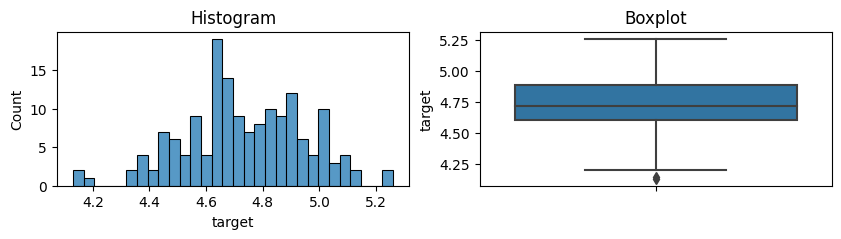

Skewness Value :  -0.15828173643344184


Diagnose variable v1


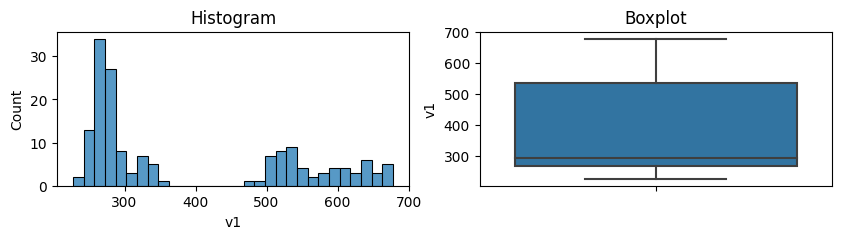

Skewness Value :  0.6399112607855549


Diagnose variable v2


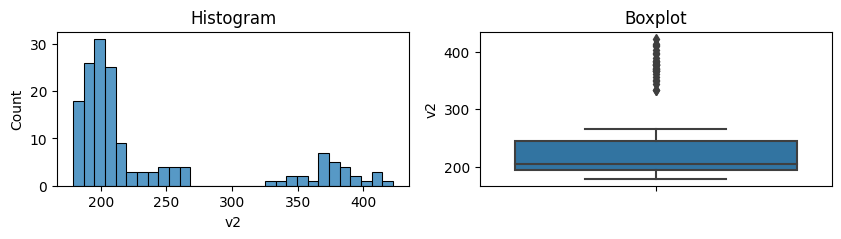

Skewness Value :  1.4617281099191999


Diagnose variable v3


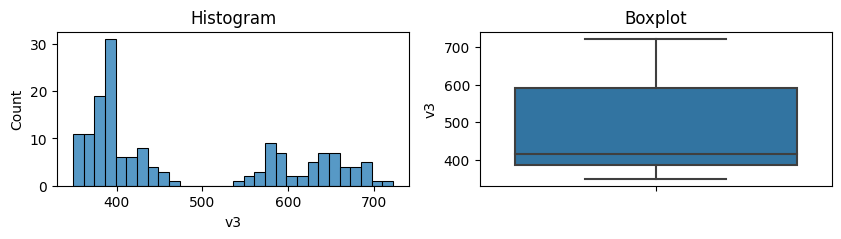

Skewness Value :  0.6026551795688342


Diagnose variable v4


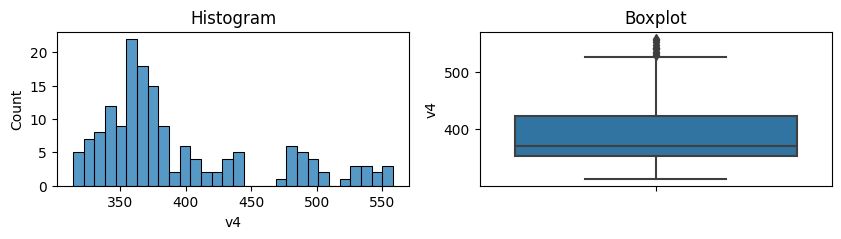

Skewness Value :  1.1436931932699348


Diagnose variable v5


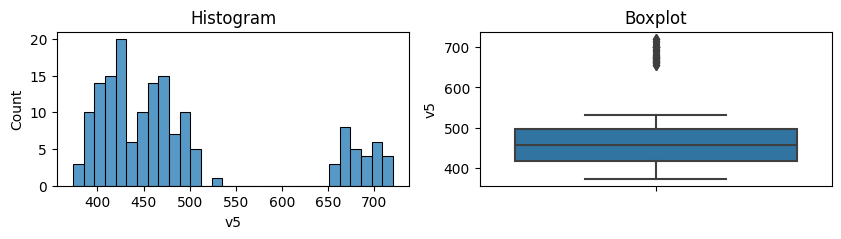

Skewness Value :  1.2706398850462628


Diagnose variable v6


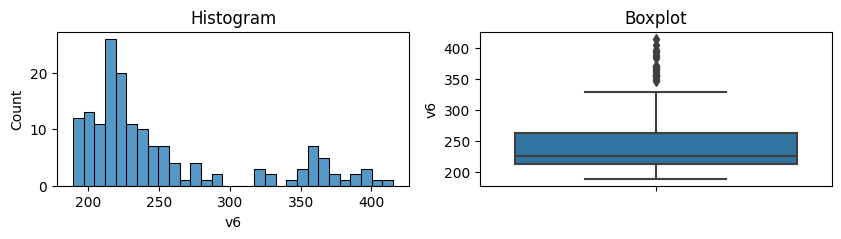

Skewness Value :  1.2954833782360857


Diagnose variable v7


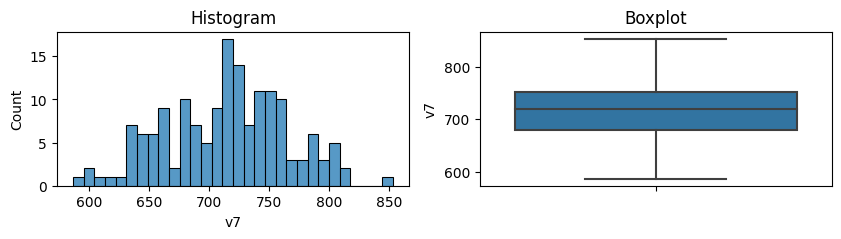

Skewness Value :  -0.10723483952914095


Diagnose variable v8


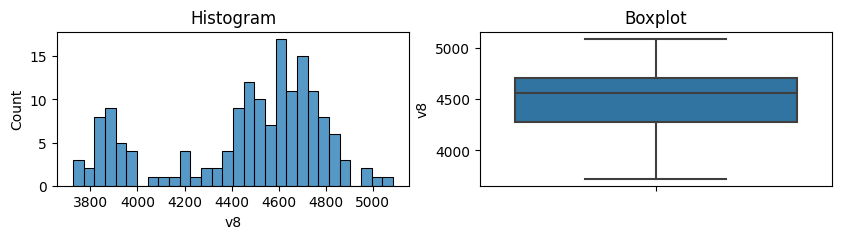

Skewness Value :  -0.7664435142947442




In [8]:
# Set List for Columns with Numerical Data Type
columns = list(df.select_dtypes(include=[np.number]).columns)

# Checking Distribution for each Columns
def diagnose(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 2))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

# Lop For Visualization
for i in columns:
    print(f'Diagnose variable {i}')
    diagnose(df, i)
    print('Skewness Value : ', df[i].skew())
    print('\n')

Overview for dataset distribution:
1. Distribution for target has skew value of -0.16, slightly skewed with 1 outlier present in the target distribution.
2. Distribution for variable v7 has skew value of -.11, with no outlier presence. v7 can be considered as normally distributed judging from how its distributed and its skewness value.
3. Distribution for other variables are considered as heavily skewed, with outliers present in v2, v4, v5, v6.

### 3.2 - EDA

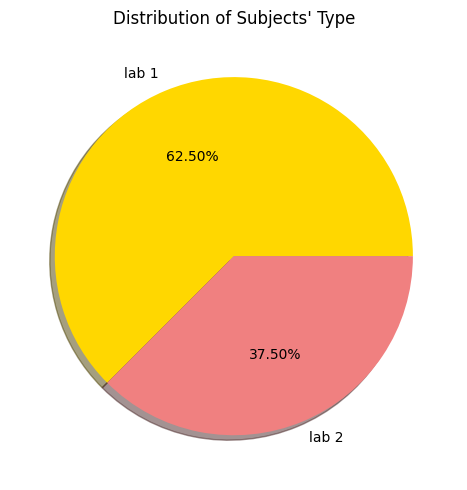

In [9]:
# Subjects Demograph
plt.figure(figsize=(5,5))
a = df['sample_type'].value_counts() # Query

# Plot in Ratio
plt.pie(a, autopct='%1.2f%%', labels=a.index, shadow=True, colors=('gold', 'lightcoral')) # Plot
plt.title("Distribution of Subjects' Type")
plt.tight_layout()
plt.show()

62.5% of subjects are labeled as `lab_1` type and 37.5% of subjects are labeled as `lab_2` type. Majority of subjects are labeled as `lab_1` type.

<Figure size 1000x500 with 0 Axes>

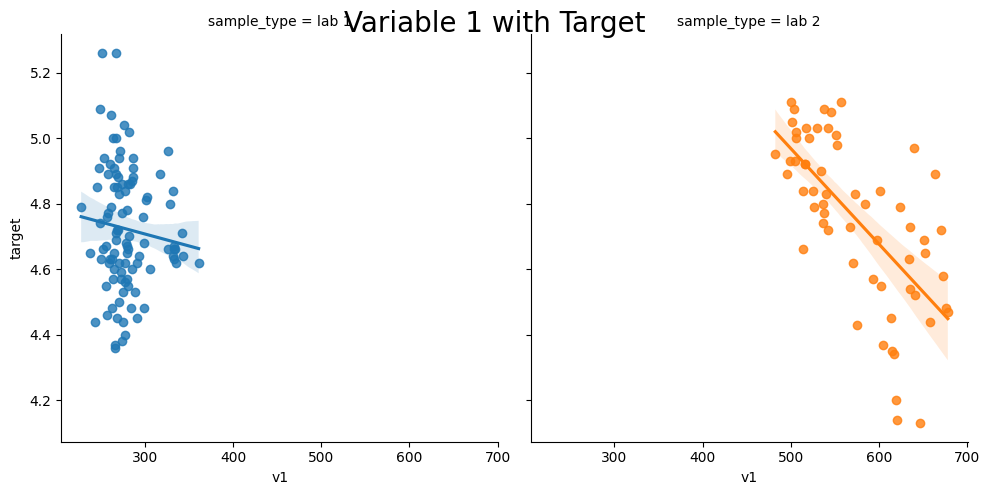

<Figure size 1000x500 with 0 Axes>

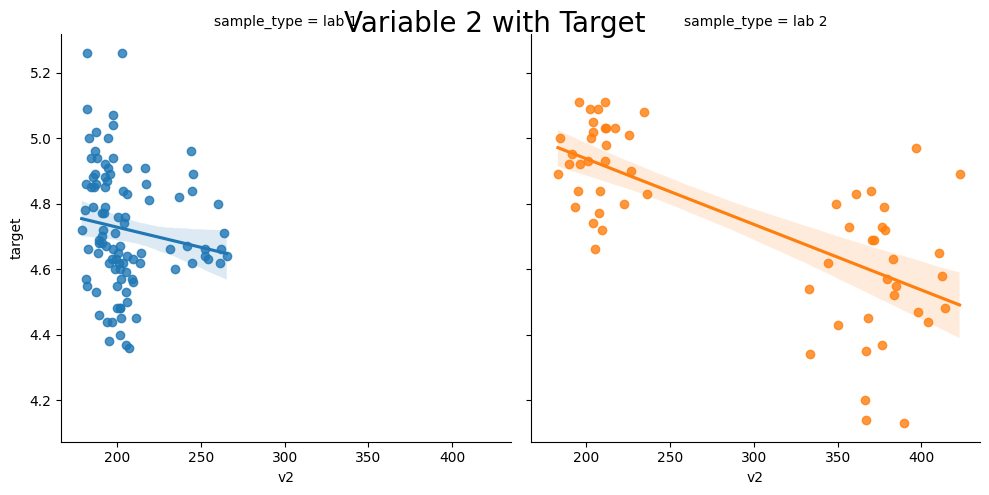

<Figure size 1000x500 with 0 Axes>

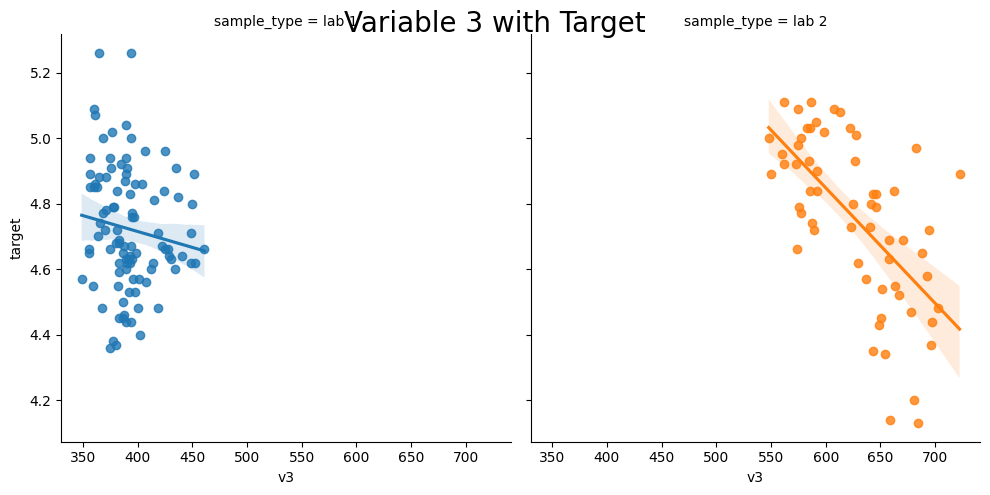

<Figure size 1000x500 with 0 Axes>

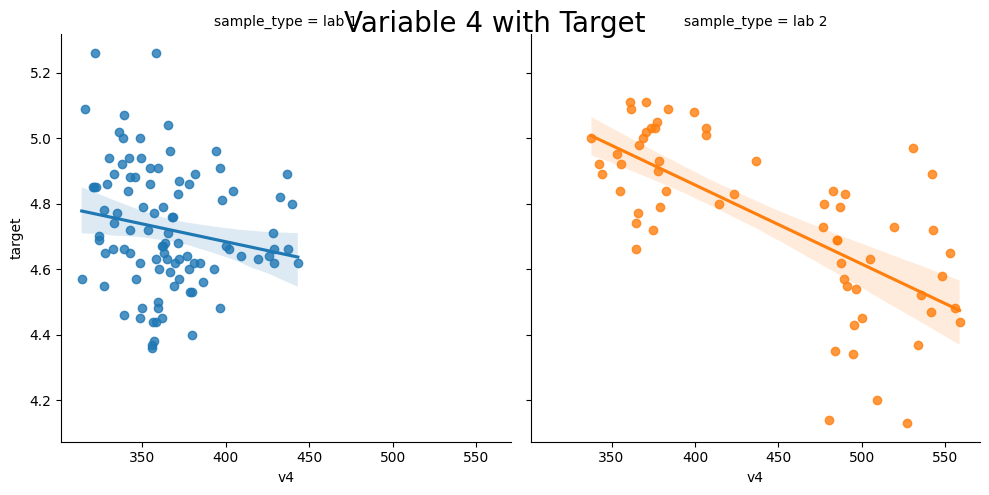

<Figure size 1000x500 with 0 Axes>

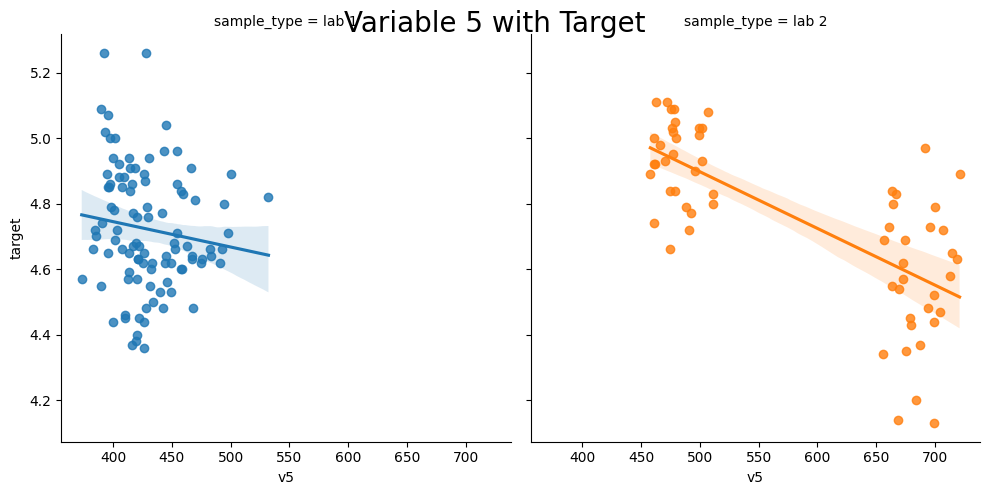

<Figure size 1000x500 with 0 Axes>

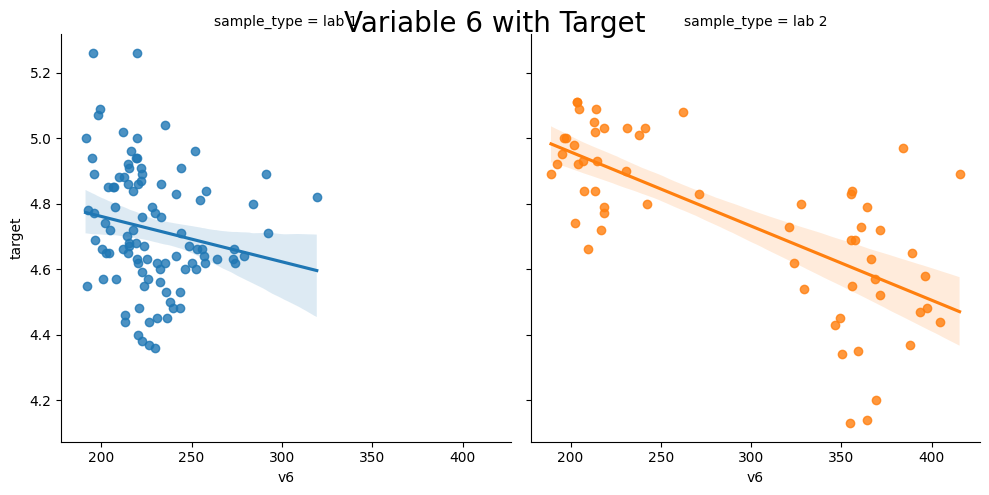

<Figure size 1000x500 with 0 Axes>

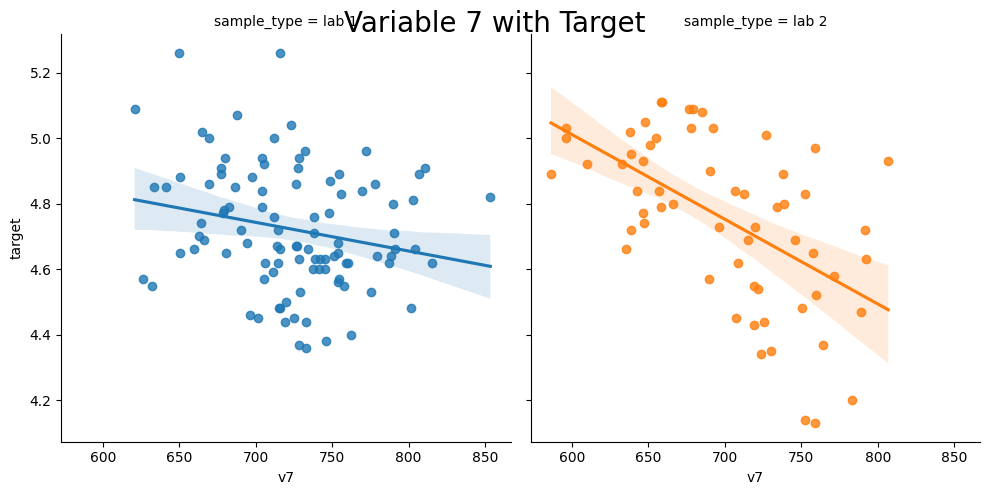

<Figure size 1000x500 with 0 Axes>

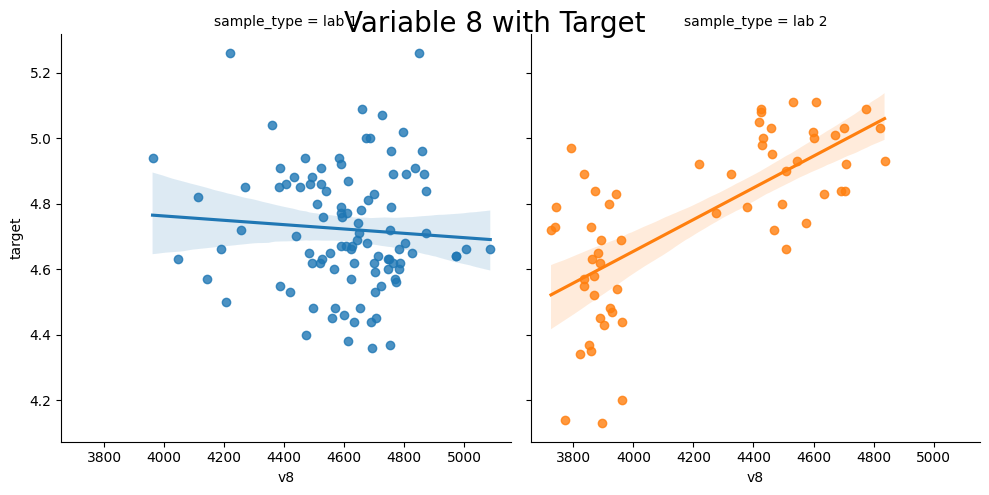

In [10]:
# Set Columns for numerical feature
num_ft = [x for x in columns if x not in ['target']]

# Visualize Scatterplot for Features and Target
for i, x in enumerate(num_ft) :
    # Define figure size
    plt.figure(figsize=(10, 5))
    plt.tight_layout()

    # Scatterplot
    a = sns.lmplot(data=df, x=x, y='target', col='sample_type', hue='sample_type').fig.suptitle(f'Variable {i+1} with Target', fontsize=20)
    
    plt.show()

Analysis for visualization:
1. Variable 1 : sample_type `lab_1` are generally grouped as subjects with values ranging from 100 - 400, while sample_type `lab_2` are generally grouped as subjects with values ranging from 500 - 700. The scatter distribution shows that group of subject with sample_type `lab_2` have a seemingly higher gradient slope compared to those of sample_type `lab_1`;
2. This specific phenomenon continued to all visualization of variable 2, 3, 4, 5, and 6, where group of subjects with sample_type `lab_2` have higher gradient slope overall.
3. Generally the gradient slope for subjects with sample_type `lab_2`, in all visualization of each variable, are having the highest nutritional value between 5.0 - 5.1 and subjects with sample_type `lab_1` are having a less slope gradient with the mean of nutritional value ranging from 4.6 - 4.8.
4. Specifically for variable 6, the value gap for this variable is higher, ranging from 200 - 400.
5. Plotted subjects for variables 7 and 8 are generally more scattered for both `sample_type` compared to other variables. With variable values for variables 7 and 8 ranging from 600 - 850 and 3900 - 5100 respectively.
6. Gradient slope for visualization of variable 8 labeled as `lab_2` sample type have different polaritiy compared to the other variables where it shows positive linier relation towards target

Possible Correlation:
1. Group of subjects that are labeled as `lab_2` sample type are generally have higher average nutritional value compared to those labeled as `lab_1`. This shows possible high correlation for `sample_type` and `target`.
2. Analyzing overall visualization of x value, writer assumed that all variables are showing the alteration of x values (values or magnitudes for variable 1 - variable 8). Variable 1 and variable 3 has a more oblique gradient slope compared to variable 2 and variable 4, this shows that range of x values represented by these 2 variables (1 and 3) relatively has higher correlation towards target.
3. For variable 8 visualization, in both `sample_type` visualization, shown that the oblique of the gradient slope are shifting, even changing in direction for sample_type `lab_2`, this shows the different treatment for variable 8 has relatively high influence towards the change of target value.

> Conclusion : treatments towards independent variables in `variable 1`, `variable 3`, `variable 8`, and `sample type` have a high influence towards `the change of target value/magnitude`.

## 4 - Feature Engineering

Summary of data exploring :
1. Dataset has both numerical values and 1 categorical column
2. Dataset has outliers in column `target, v2, v4, v5, and v6`
3. Assumed correlated feature are `sample_type, v1, v3, and v8`

Hence the preprocessing needed for this dataset are as follows:
1. Split Features and Target, Train and Test set.
2. Dropping outliers, since normalizing the dataset could distort overall recorded data and the end objective is to make a prediction, not a data clustering.
3. Scaling numerical data since the value from variable 1 to 8 are at hundreds scale.
4. Encoding categorical data to numerical.
5. Find and select features with high correlation towards target.

In [11]:
# Sample 1 Row of Data for Inferencing
# Before continue with Data Preprocessing
data_inference = df.sample(n=1, random_state=11)

# Drop Sampled Data
df = df.drop(data_inference.index).reset_index(drop=True)
print('Shape after remove sampled data :', df.shape)
data_inference

Shape after remove sampled data : (159, 10)


,target,v1,v2,v3,v4,v5,v6,v7,v8,sample_type
131,4.44,658.4375,403.875,696.75,558.5,699.5625,404.5625,725.875,3961.4375,lab 2


### 4.1 - Split Dataset

In [12]:
# Split Target & Features
y = df['target']
x = df.drop(['target'], axis=1)
print('x shape after drop sampled data:', x.shape)

# Split Train & Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=11)

# Split Train-set & Validation-set
#x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.20, random_state=11)

print('\nx train Size : ', x_train.shape)
print('y train Size : ', y_train.shape)
#print('\nx val Size   : ', x_val.shape)
#print('y val Size   : ', y_val.shape)
print('\nx test Size  : ', x_test.shape)
print('y test Size  : ', y_test.shape)

x shape after drop sampled data: (159, 9)

x train Size :  (127, 9)
y train Size :  (127,)

x test Size  :  (32, 9)
y test Size  :  (32,)


Since the dataset are small, writer decided to divide the dataset to only train and test set. Dividing the dataset into 3 (validation set) will resulting in lesser data in training process hence could make the model performance to be poor in a new unknown dataset.

### 4.2 - Handling Outliers

From the dataset exploration earlier, we found outlier presences in columns `v2, v4, v5, and v6`. Since we already analyze that there are no values that are far apart from the distribution, it is safe to assume that these are natural outliers and scaling the data with MinMaxScaler is enough to resolve this issue.

But since feature importance methodes are generally sensitive to outliers, hence specifically for feature importance section, we will only include train set data with no outliers presence.

In [31]:
# Define List Columns with Outliers
outliers = ['v2', 'v4', 'v5', 'v6']

Function **boundaries** is used to calculate upper and lower boundaries, and inside the boundary calculation are based on the feature distribution. Since all the columns with outlier presences are categorized as extremely skewed (skew value > 1)

In [32]:
# Function to calculate upper and lower boundaries
def boundaries(df, variable):
    # Calculate IQR
    IQR = x_train[variable].quantile(0.75) - x_train[variable].quantile(0.25)

    # For Extremly Skewed Data
    lower = x_train[variable].quantile(0.25) - (IQR * 3)
    upper = x_train[variable].quantile(0.75) + (IQR * 3)
    return upper, lower

# List For Each Variables Boundaries
list_upper = []
list_lower = []

# Loop to Calulate
for i in outliers:
    upper, lower = boundaries(x_train, i)

    # Append list
    list_upper.append(upper)
    list_lower.append(lower)

In [33]:
# Flagging Outliers
o1 = np.where(x_train['v2'] > list_upper[0], True, False)
o2 = np.where(x_train['v4'] > list_upper[1], True, False)
o3 = np.where(x_train['v5'] > list_upper[2], True, False)
o4 = np.where(x_train['v6'] > list_upper[3], True, False)

In [34]:
# Trim Outliers in x_train
x_train_trimmed = x_train.loc[~(o1+o2+o3+o4)]
print('x train shape:', x_train.shape)
print('trimmed x train shape:', x_train_trimmed.shape)

# Trim y_train Based on x_train_trimmed Index
y_train_trimmed = y_train[x_train_trimmed.index]
print('trimmed y train shape:', y_train_trimmed.shape)

x train shape: (127, 9)
trimmed x train shape: (117, 9)
trimmed y train shape: (117,)


### 4.3 - Finding Key Factors

Dataset contains both numerical and categorical data type, hence utilizing phik correlation will ease the process of finding key factors since it can be used to identify variable relationships regardless of their data type (numerical or categorical).

In [35]:
# Make Copy of Dataset for Feature Correlation Check
correlation_df = x_train_trimmed.copy()

# Add Target to Dataset Copy
correlation_df['target'] = y_train_trimmed.copy()

In [36]:
# Phik Correlation Overview
phik_overview = correlation_df.phik_matrix()
phik_overview

interval columns not set, guessing: ['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'target']


,v1,v2,v3,v4,v5,v6,v7,v8,sample_type,target
v1,1.000000,0.888684,0.833599,0.705595,0.735842,0.693302,0.482113,0.642052,1.000000,0.554929
v2,0.888684,1.000000,0.757095,0.785977,0.720989,0.820203,0.577682,0.663485,0.684383,0.459579
v3,0.833599,0.757095,1.000000,0.902328,0.791805,0.873558,0.660942,0.618057,1.000000,0.445236
v4,0.705595,0.785977,0.902328,1.000000,0.798021,0.894826,0.605943,0.666547,0.498944,0.199534
v5,0.735842,0.720989,0.791805,0.798021,1.000000,0.765845,0.760925,0.733956,0.683222,0.415702
v6,0.693302,0.820203,0.873558,0.894826,0.765845,1.000000,0.619258,0.665928,0.473464,0.520481
v7,0.482113,0.577682,0.660942,0.605943,0.760925,0.619258,1.000000,0.591649,0.353762,0.256782
v8,0.642052,0.663485,0.618057,0.666547,0.733956,0.665928,0.591649,1.000000,0.602503,0.655577
sample_type,1.000000,0.684383,1.000000,0.498944,0.683222,0.473464,0.353762,0.602503,1.000000,0.561655
target,0.554929,0.459579,0.445236,0.199534,0.415702,0.520481,0.256782,0.655577,0.561655,1.000000


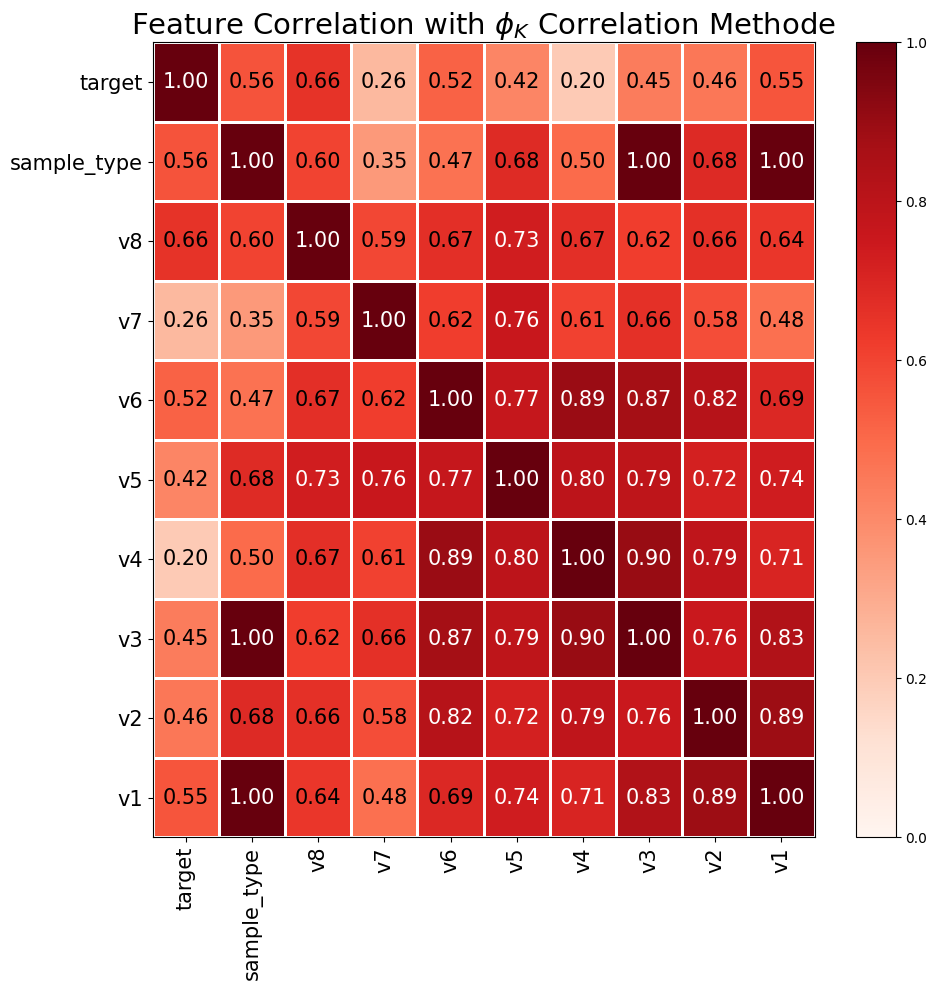

In [37]:
# Plot Phik Correlation Matrix
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Reds', title=r'Feature Correlation with $\phi_K$ Correlation Methode', fontsize_factor=1.5,
                        figsize=(10,10))
plt.tight_layout()

>Features with high correlation towards target are interpret with correlation value above 0.5 or correlation value below -0.5.

Since we are trying to utilize a model that implement mathematical' linear relationship, thus we should only include features with the highest correlation, these features are `v1, v6, v8, and sample_type`.

Comparing our data exploration with result from phik correlation, we get `v1, v6, v8, and sample_type are features with value of correlation towards target above 0.5`, we missassume the correlation of `v3 and v6` towards target, where the correlation of v6 towards target is actually higher compared to correlation of v3 towards target.

As a result of these analysis, writer recommended to put more attention towards treatments with the most efficient outcome of nutritional value which are treatments done for `v1, v6, v8 and sample type lab_2`.

As for features included for model training, writer decided to include all highly correlated features. This decision is a result from weighing performance result from severall cases as follow:
1. Model training with all features included
2. Model training with all 1 feature with the highest value of correlation, this was done due to avoid multicollinearity that are more bound to happen in training the given dataset (generally has linear relation towards target value) with model that implement linier relation.
3. Model training with 2 and 3 features with the highest correlation towards target as comparation to scenario with only 1 variable included.
4. Model training with all highly correlated features included and no handling done to outliers.
5. Model training with all highly correlated features included and with outliers trimmed from the train set.

The experiment' conclusions then narrowed into 2 points as follow:
1. It is shown that including more features with high correlation toward target has improved the performance results for all utilized models. Since feature selection does not necessarily means a must followed benchmark, thus in the model training we will include all highly correlated features.
2. Though performance results for no outliers treatment are generally higher, handling outliers in this specific situation is a necessity, higher result does not necessarily means better and more accurate prediction results, with a more bigger/larger dataset the performance result for model with no outlier treatment possibly tend to be more biased.

The results for previously mentioned experiments are included below.


In [57]:
# Select Feature
correlation_target = abs(phik_overview['target'])
selected = correlation_target[(correlation_target > .5)]

# Exclude Target
exclude = ['target']

# Make List
selected_list = list(selected.index)
selected_list = [x for x in selected_list if x not in exclude]
selected_list # Show Results

['v1', 'v6', 'v8', 'sample_type']

In [90]:
# Filter Selected Data
x_train_selected = x_train[selected_list].reset_index(drop=True)
x_test_selected = x_test[selected_list].reset_index(drop=True)

# To Dataframe
x_train_df = pd.DataFrame(x_train_selected)
x_test_df = pd.DataFrame(x_test_selected)

#### Model Training Experiment Results

```
Cross validation results with all features included

Linear Regression r2 score      :  0.1967710068188856
SVR r2 score                    :  0.2490654559896044
KNeighbors Regression r2 score  :  0.14776659425724484
DecissionTree Regressor r2 score:  -0.44959237539596464
RandomForest Regressor r2 score :  0.11273668863783097
XGBoost Regressor r2 score      :  -0.004595304244930776
```

```
Cross validation results with 1 selected features (v8)

Linear Regression r2 score      :  0.07965347001571584
SVR r2 score                    :  0.10259582714570119
KNeighbors Regression r2 score  :  -0.08108035714097654
DecissionTree Regressor r2 score:  -0.9234463980115336
RandomForest Regressor r2 score :  -0.3267961828378082
XGBoost Regressor r2 score      :  -0.14545281145640424
```

```
Cross validation results with 2 selected features (v8 and sample_type)

Linear Regression r2 score      :  0.144871566125006
SVR r2 score                    :  0.1952865847412255
KNeighbors Regression r2 score  :  0.07000337413537908
DecissionTree Regressor r2 score:  -0.5623369343116252
RandomForest Regressor r2 score :  -0.15565451068687708
XGBoost Regressor r2 score      :  -0.016839883286463887
```

```
Cross validation results with 3 selected features (v6, v8 and sample_type)

Linear Regression r2 score      :  0.23575348783447447
SVR r2 score                    :  0.251297623814414
KNeighbors Regression r2 score  :  0.15023772597981527
DecissionTree Regressor r2 score:  -0.541299441757743
RandomForest Regressor r2 score :  -0.046569361748711645
XGBoost Regressor r2 score      :  -0.07396961097768277
```

```
Cross validation results with 4 selected features (v1, v6, v8, and sample_type)

Linear Regression r2 score      :  0.24295765020498683
SVR r2 score                    :  0.26216641646701555
KNeighbors Regression r2 score  :  0.054569711024217794
DecissionTree Regressor r2 score:  -0.4995873746512616
RandomForest Regressor r2 score :  0.0015498882730805796
XGBoost Regressor r2 score      :  -0.2953545077182993
```

```
Cross validation results with 4 selected features (v1, v6, v8, and sample_type) and outlier presence in features trimmed

Linear Regression r2 score      :  0.145308368379166
SVR r2 score                    :  0.21005826571317004
KNeighbors Regression r2 score  :  0.06772942516294697
DecissionTree Regressor r2 score:  -0.5808623285918858
RandomForest Regressor r2 score :  0.10658684823427562
XGBoost Regressor r2 score      :  -0.020838722314573954
```

### 4.4 - Pipeline

Since distributions for each feature are generally skewed, we will utilize MinMaxScaler since it works by considering minimum and maximum value of data compared to StandardScaler that works by considering median values from features distribution, which only proper for normally distributed data.

OneHotEncoder utilized as encoder to ensure that in training section, the model will not confuse the order of label for `lab_1` and `lab_2`.

In [91]:
## Get New Numerical Columns and Categorical Columns
num_col = x_train_df.select_dtypes(include=np.number).columns.tolist()
cat_col = x_train_df.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns    : ', num_col)
print('Categorical Columns  : ', cat_col)

Numerical Columns    :  ['v1', 'v6', 'v8']
Categorical Columns  :  ['sample_type']


In [92]:
# Numerical Preprocess Pipeline
num_pipe = make_pipeline(MinMaxScaler())

# Categorical Preprocess Pipeline
cat_pipe = make_pipeline(OneHotEncoder())

# Complete Pipeline
prep_pipe = ColumnTransformer([
            ('num_pipe', num_pipe, num_col),
            ('cat_pipe', cat_pipe, cat_col)
            ])

In [93]:
# Pipeline for Basline Models
pipe_lr  = make_pipeline(prep_pipe, LinearRegression())
pipe_svr = make_pipeline(prep_pipe, SVR())
pipe_kn  = make_pipeline(prep_pipe, KNeighborsRegressor())
pipe_dt  = make_pipeline(prep_pipe, DecisionTreeRegressor())
pipe_rf  = make_pipeline(prep_pipe, RandomForestRegressor())
pipe_xb  = make_pipeline(prep_pipe, XGBRegressor())

## 5 - Machine Learning

### 5.1 - Model Training

The dataset contains less than 200 row of entries, the only algorithm fit for this case is machine learning.

Below we utilized 2 linear models which are Linear Regression and Support Vector Regression, and 4 non linear models, which are KNeighbors Regressor, Random Forest Regressor and XGBoost Regressor. Although we included all highly correlated features, writer assume that the linier models will have a better performance result since it is more fitted to explain our dataset.

In [94]:
# LinearRegression
pipe_lr.fit(x_train_df, y_train)

# SVR
pipe_svr.fit(x_train_df, y_train)

# KNeighborsRegressor
pipe_kn.fit(x_train_df, y_train)

# DecissionTreeRegressor
pipe_dt.fit(x_train_df, y_train)

# RandomForestRegressor
pipe_rf.fit(x_train_df, y_train)

# XGBoostRegressor
pipe_xb.fit(x_train_df, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['v1', 'v6', 'v8']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['sample_type'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

### 5.2 - Model Evaluation

In [95]:
# Custom KFold Object
cv = KFold(n_splits=5, shuffle=True, random_state=11)

`n_splits = 5` is the result of multiple experiments, increasing the value to above 5 had resulting in lower performance results.

In [96]:
# Implement Cross Validation to All Baseline Models
# Set Metrics to r2 with scoring
cv_lr = cross_val_score(pipe_lr, x_train_df, y_train, 
                                   scoring='r2', cv=cv)

cv_svr = cross_val_score(pipe_svr, x_train_df, y_train, 
                                   scoring='r2', cv=cv)

cv_kn = cross_val_score(pipe_kn, x_train_df, y_train, 
                                   scoring='r2', cv=cv)

cv_dt = cross_val_score(pipe_dt, x_train_df, y_train, 
                                   scoring='r2', cv=cv)

cv_rf = cross_val_score(pipe_rf, x_train_df, y_train, 
                                   scoring='r2', cv=cv)

cv_xb = cross_val_score(pipe_xb, x_train_df, y_train, 
                                   scoring='r2', cv=cv)                               

Because of writer's limited domain knowledge related to the dataset, writer decided to use a metric that generally tells the model performance in explaining the observed/trained data, in which r2 score is suitable.

In [97]:
# Show Results
print("All 5 folds cross validation score on Train set\n")
print("Linear Regression r2 score      : ", cv_lr) 
print("SVR r2 score                    : ", cv_svr)
print("KNeighbors Regression r2 score  : ", cv_kn)   
print("DecissionTree Regressor r2 score: ", cv_dt)   
print("RandomForest Regressor r2 score : ", cv_rf)   
print("XGBoost Regressor r2 score      : ", cv_xb)   

All 5 folds cross validation score on Train set

Linear Regression r2 score      :  [0.19526175 0.46099109 0.06703441 0.25878212 0.23271889]
SVR r2 score                    :  [0.21258181 0.48571983 0.12872177 0.24753312 0.23627555]
KNeighbors Regression r2 score  :  [-0.01833737  0.34402311 -0.18887941  0.00647424  0.12956799]
DecissionTree Regressor r2 score:  [-0.22180643 -0.06062273 -0.87720548 -0.95100381 -0.62025856]
RandomForest Regressor r2 score :  [ 0.16014306  0.37057809 -0.29305411 -0.33722828  0.05907495]
XGBoost Regressor r2 score      :  [ 0.02007247  0.04956876 -0.6554107  -0.68591688 -0.2050862 ]


In [98]:
# Show Results
print("Mean of cross validation score on Train set\n")
print("Linear Regression r2 score      : ", np.mean(cv_lr)) 
print("SVR r2 score                    : ", np.mean(cv_svr))
print("KNeighbors Regression r2 score  : ", np.mean(cv_kn))   
print("DecissionTree Regressor r2 score: ", np.mean(cv_dt))   
print("RandomForest Regressor r2 score : ", np.mean(cv_rf))   
print("XGBoost Regressor r2 score      : ", np.mean(cv_xb))   

Mean of cross validation score on Train set

Linear Regression r2 score      :  0.24295765020498683
SVR r2 score                    :  0.26216641646701555
KNeighbors Regression r2 score  :  0.054569711024217794
DecissionTree Regressor r2 score:  -0.5461793997554174
RandomForest Regressor r2 score :  -0.008097258194900637
XGBoost Regressor r2 score      :  -0.2953545077182993


1. Linear Regression model had succeeded in explaining 14.53% of the given dataset' variability.
2. Support Vector Regression had succeeded in explaining 21.00% of the given dataset' variability which is the highest result among all the baseline models.
3. As previously had been assumed, linear model is more suited to be implemented for the dataset, and the overally low performance results are inevitable given that the dataset contains only 160 rows of entries.

> As a conclusion, given the dataset, comparing the performance result and time process, Support Vector is the better performance due to its ability in explaining both linear and non linear relationship between variables compared to Linear Regression that can only explain linear relationship between variables in the dataset, hence we will try to tune SVR model in the next section.

## 6 - Tuning & Results

### 6.1 - Tuning

The chosen parameters to be setted in GridSearchCV are as follow:
1. kernel, to see whether other kernel type could explain the dataset better compared to the default parameter (rbf).
2. gamma, to see whether the default parameter of gamma (scale) is better than parameter auto.
3. C, since the default value for C is 1, writer chose value for C that are close to 1, and add another value that are far apart as a comparation, to see perhaps it could give a better result.

In [99]:
# Defining Hyperparameters
kernel = ['linear', 'rbf', 'sigmoid', 'precomputed']
gamma  = ['scale', 'auto']
C      = [0.1, 1, 2, 5, 10, 100]

In [100]:
# Set Parameter
parameter = {
    'svr__kernel' : kernel,
    'svr__gamma'  : gamma,
    'svr__C'      : C
}

In [101]:
# Train with GridSearchCV
search = GridSearchCV(pipe_svr, parameter, cv=5, scoring='r2')
search.fit(x_train_df, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 406, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['v1',
                                                                          'v6',
                                                                          'v8']),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         ['sample_type'])])),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.1, 1, 2, 5, 10, 100],
                         'svr__gamma': ['scale', 'auto'],
                         'svr__kernel': ['linear', 'rbf', 'sigmoid',
                                         'precomputed']},
             scoring='r2')

In [102]:
# Show Best Parameters
search.best_params_

{'svr__C': 1, 'svr__gamma': 'auto', 'svr__kernel': 'rbf'}

The best parameters from tuning result are as follow:
1. `C set to 1 (same as default)`
2. `gamma set to auto`
3. `kernel set to rbf (same as default)`

### 6.2 - Predict with Tuned Model

In [103]:
# Set Best Parameters 
tuned_pipe_svr = search.best_estimator_

# Predict Train and Test Set
y_pred_train = tuned_pipe_svr.predict(x_train_df)
y_pred_test  = tuned_pipe_svr.predict(x_test_df)

In [104]:
# Check Performance in Train and Test Set
print('R2 score in train set :', r2_score(y_train, y_pred_train))
print('R2 score in test set :', r2_score(y_test, y_pred_test))

R2 score in train set : 0.2943741922975365
R2 score in test set : 0.14115885566626463


Before, writter had experimented predicting the test set with baseline models and the result was as follow:
```
1. R2 score in train set : 0.21
2. R2 score in test set  : 0.10
```

Results after tuning:
```
1. R2 score in train set : 0.29
2. R2 score in test set  : 0.14
```
Comparing result above with the tuned model performance, we get improvement for both performance in train set and test set, though the  model performance is still overfitted, but this is once again inevitable given the small dataset.

## 7 - Model Inference

Since the preprocessing step are integrated with pipeline, saving tuned model will be enough for inferencing in different notebook.

In [105]:
# Save Model
with open('tuned_svr.pkl', 'wb') as model:
    pickle.dump(tuned_pipe_svr, model)

# Saving List of Selected Columns
with open('selected_feature.txt', 'w') as features:
    json.dump(selected_list, features)

# Saving Inferenced Data
sample = data_inference.to_json() # Convert to JSON
with open('data_sample.txt', 'w') as data_sample:
    json.dump(sample, data_sample)

# IV - Conclusion

```
1. Key factors that are highly influence the change of nutritional values are variable 1, variable 6, variable 8, and sample type.
2. Given the small dataset, including more data in model training (ignore outliers handling, include all features) gives a higher r2 score but was considered to be more biased.
3. If more entries of dataset was given, some experiments that could help in improving the model are:
  * adjust the correlated feature in model training, and compare the result with other scenarios.
  * exploring a more broad scenario in model tuning with GridSearchCV
  * implementing Artificial Neural Network algorithm as one of the model training scenario.
```